In [1]:
import quake_envs
from quake_envs.simulations.utils import *
from quake_envs.simulations.interdep_network import InterdependentNetworkSimulation
import geopandas as gpd
import pandas as pd
from quake_envs.simulations.earthquake_funcs import AttenuationModels
from pyincore import IncoreClient
from geopy.distance import geodesic


In [2]:
def get_bearer_token():
  return "eyJhbGciOiJSUzI1NiIsInR5cCIgOiAiSldUIiwia2lkIiA6ICJfa1pWbFM4OU1SVWNZaURYUjByaGVVSUh6RzdZWXZ4eXcxZ1l3WjJZajVjIn0.eyJleHAiOjE3NDk5Mzc0MDYsImlhdCI6MTc0OTkyMzAwNiwiYXV0aF90aW1lIjoxNzQ5OTIzMDA0LCJqdGkiOiJiYzY5MWVjNC02NTg1LTQwZDctOTkyNS1hOTVjMDAxMDEzMGQiLCJpc3MiOiJodHRwczovL3Rvb2xzLmluLWNvcmUub3JnL2F1dGgvcmVhbG1zL0luLWNvcmUiLCJhdWQiOlsiSU5DT1JFIiwiYWNjb3VudCJdLCJzdWIiOiIyNWYwN2ZmMy1kMGU4LTQxZGQtOWMxOC0xODZmNjg0M2ZhYzUiLCJ0eXAiOiJCZWFyZXIiLCJhenAiOiJyZWFjdC1hdXRoIiwibm9uY2UiOiJmMGQ5ZDcyNi0xZDliLTQ0MmMtODA5Ny1hODllYzU1ODdiZmIiLCJzZXNzaW9uX3N0YXRlIjoiYzA0MDJhY2MtZGVlNS00MjU4LWIwZDAtMjY5Y2M1MWI2Zjc3IiwiYWxsb3dlZC1vcmlnaW5zIjpbImh0dHBzOi8vdG9vbHMuaW4tY29yZS5vcmciLCJodHRwczovL2luY29yZS5uY3NhLmlsbGlub2lzLmVkdSIsImh0dHA6Ly9sb2NhbGhvc3Q6MzAwMCJdLCJyZWFsbV9hY2Nlc3MiOnsicm9sZXMiOlsiZGVmYXVsdC1yb2xlcy1pbi1jb3JlIiwib2ZmbGluZV9hY2Nlc3MiLCJ1bWFfYXV0aG9yaXphdGlvbiIsImluY29yZV91c2VyX3JvbGUiXX0sInJlc291cmNlX2FjY2VzcyI6eyJhY2NvdW50Ijp7InJvbGVzIjpbIm1hbmFnZS1hY2NvdW50Iiwidmlldy1wcm9maWxlIl19fSwic2NvcGUiOiJvcGVuaWQgcHJvZmlsZSBlbWFpbCIsInNpZCI6ImMwNDAyYWNjLWRlZTUtNDI1OC1iMGQwLTI2OWNjNTFiNmY3NyIsImVtYWlsX3ZlcmlmaWVkIjp0cnVlLCJuYW1lIjoiQW50b25pb3MgTWF2cm90YXMiLCJncm91cHMiOlsiaW5jb3JlX3VzZXIiXSwicHJlZmVycmVkX3VzZXJuYW1lIjoidG9ueV9tYXYiLCJnaXZlbl9uYW1lIjoiQW50b25pb3MiLCJmYW1pbHlfbmFtZSI6Ik1hdnJvdGFzIiwiZW1haWwiOiJhbnRvbmlvc21hdnJvdGFzQGdtYWlsLmNvbSJ9.bYU91cncayTzWIJyASY79r-nLUlAfnaDes6FmPiEt250RQ1a18Pzlsxhfl_LCIKIYvi1AJWOUnksEcZGhVhZT_sv1GsAPDGoiKXwynS26mKOyHjgpc4nX7PCqNiJlFJjF0T-UGKpOa8gBAD8ILXVRXVmlmXGrgXts_QZCNBP_Y48vYdbrhjEtO2r_nEGnzDS0FEnlHp50PzNyuqyMOHDaAt9Od3_ayxelPTzjoN5ULbV3QImLTaZDGLCPscGS53vyRBDucst-4aLox-HICZH8tyD6y9nvHi2yYego7Te7x68L6zZLWiWXH9IhQM1uNRGiEdHgy6nQha3phNQsvGb-g"

bearer_token = get_bearer_token()

In [3]:
client = IncoreClient()

Connection successful to IN-CORE services. pyIncore version detected: 1.21.0


Set 2 study buildings with bounds: (-118.24302483704504, 34.053265561193264, -118.24141185843887, 34.05370943501951)
Set local road network with 2 links.
Loading network Anaheim, USA...
Network Anaheim, USA loaded
Reading the network data took 0.0 secs

Successfully loaded net df and demand df. Successfully converted them to <quake_envs.simulations.traffic_assignment.FlowTransportNetwork object at 0x000001A509382E80>


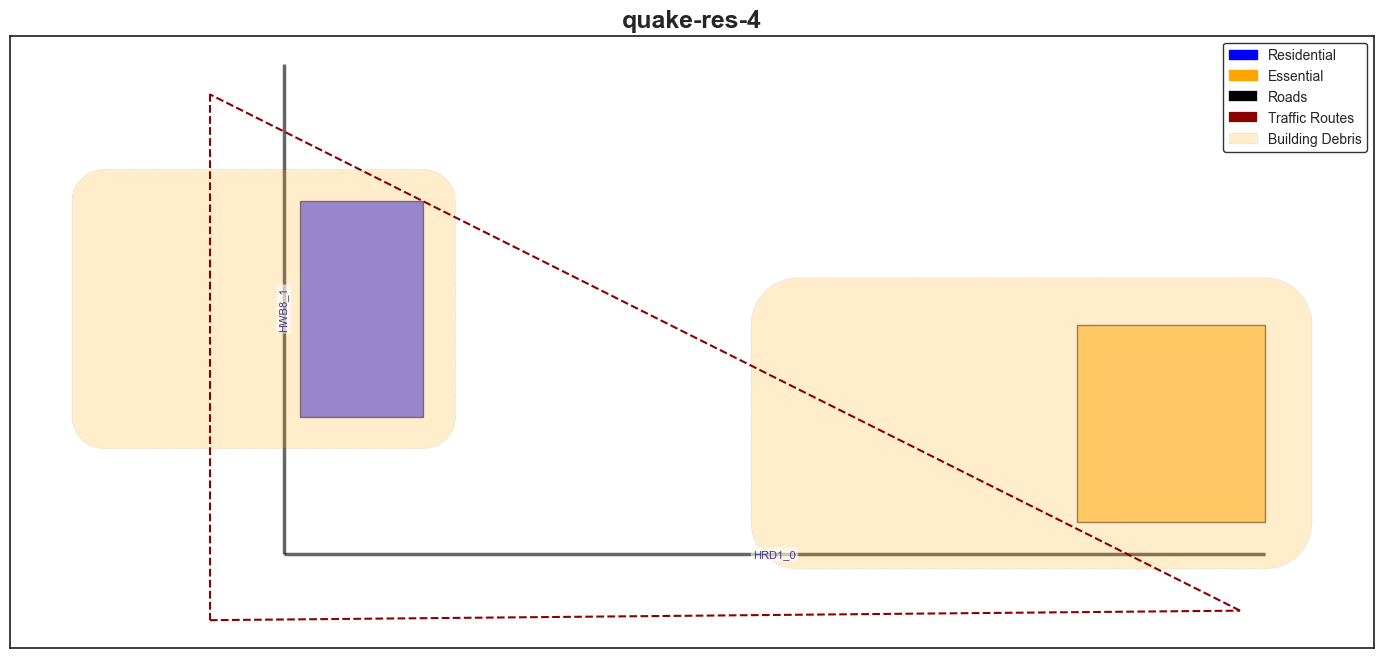

In [4]:
n_agents = 4
env_data = PathUtils.env_data[str(n_agents)]
in_buildings = gpd.read_file(env_data["buildings"])
in_roads = gpd.read_file(env_data["roads"])
in_traffic_gdf = gpd.read_file(env_data["traffic_links"])
in_traffic_dem = pd.read_csv(env_data["traffic_dem"])
in_traffic_net = pd.read_csv(env_data["traffic_net"])

sim = InterdependentNetworkSimulation(
    use_premade=True,
    buildings_study_gdf=in_buildings,
    roads_study_gdf=in_roads,
    traffic_net_df=in_traffic_net,
    traffic_dem_df=in_traffic_dem,
    traffic_links_gdf=in_traffic_gdf,
    verbose=True
)
sim.buildings_study.get_debris()
sim.viz_environment("quake-res-4", show_road_ids=True)



In [5]:
sim.earthquake.DEL_incore_earthquake(bearer_token, "6821c7b81384cc60bc0800aa")

Error: 404 - Could not find an earthquake with id 6821c7b81384cc60bc0800aa


In [5]:
import json
import os

earthquake_magnitudes = [5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0]
iterations_per_magnitude = 100

save_IMs_directory = r"C:\Users\Anton\OneDrive\Desktop\tudelft_thesis\qres_marl\quake_envs_pkg\quake_envs\simulations\earthquake"

def get_min_nonzero(values):
    return min((v for v in values if v not in [None, 0.0]), default=0.001)  # small fallback if all invalid

for M in earthquake_magnitudes:
    save_bldg_IMs_file = os.path.join(save_IMs_directory, f"toy_city_4_bldg_IM_{M}.json")
    save_road_IMs_file = os.path.join(save_IMs_directory, f"toy_city_4_road_IMs_{M}.json")

    # Initialize or load existing building IMs dict
    if os.path.exists(save_bldg_IMs_file):
        with open(save_bldg_IMs_file, 'r') as f:
            bldg_IMs = json.load(f)
    else:
        bldg_IMs = {}

    # Initialize or load existing road IMs dict
    if os.path.exists(save_road_IMs_file):
        with open(save_road_IMs_file, 'r') as f:
            road_IMs = json.load(f)
    else:
        road_IMs = {}

    for iteration in range(iterations_per_magnitude):
        # your quake model setup and POST calls
        src = sim.earthquake.generate_random_point_in_ring(sim.center, 1, 100)
        quake_model_dict = sim.earthquake.create_earthquake_model(
            name='toy_city_30_eq_model',
            description='Earthquake model for toy city with 10 components',
            src_point=src,
            magnitude=M,
            depth=5,
            demand_type='PGA',
            bounds=sim.bounds,
            attenuation_models={AttenuationModels.AB1995: '1.0'}
        )
        model_save_path = os.path.join(save_IMs_directory, "incore_eq_model_30.json")
        sim.earthquake.save_earthquake_json(quake_model_dict, model_save_path)
        eq_model = sim.earthquake.read_earthquake_json(model_save_path)

        quake_id = sim.earthquake.POST_incore_earthquake(client, eq_model)
        sim.earthquake.POST_incore_eq_building_hazard_values(client, quake_id)
        sim.earthquake.POST_incore_eq_road_hazard_values(client, quake_id, M=M)

        # Save IMs files temporarily
        temp_bldg_path = os.path.join(save_IMs_directory, "temp_bldg_IM.json")
        temp_road_path = os.path.join(save_IMs_directory, "temp_road_IM.json")
        sim.earthquake.save_building_IM(save_IMs_directory, "temp_bldg_IM.json")
        sim.earthquake.save_road_IM(save_IMs_directory, "temp_road_IM.json")

        # Load the newly saved IMs
        with open(temp_bldg_path, 'r') as f:
            current_bldg_IM = json.load(f)
        with open(temp_road_path, 'r') as f:
            current_road_IM = json.load(f)

        # === Sanitize Building IMs ===
        bldg_values = list(current_bldg_IM.values())
        min_bldg_val = get_min_nonzero(bldg_values)
        current_bldg_IM = {
            k: (v if v not in [None, 0.0] else min_bldg_val)
            for k, v in current_bldg_IM.items()
        }

        # === Sanitize Road IMs ===
        # Each road IM value is a list [SA0.3, SA1, PGD]
        all_sa03 = [v[0] for v in current_road_IM.values()]
        all_sa1 = [v[1] for v in current_road_IM.values()]
        all_pgd = [v[2] for v in current_road_IM.values()]

        min_sa03 = get_min_nonzero(all_sa03)
        min_sa1 = get_min_nonzero(all_sa1)
        min_pgd = get_min_nonzero(all_pgd)

        current_road_IM = {
            k: [
                v[0] if v[0] not in [None, 0.0] else min_sa03,
                v[1] if v[1] not in [None, 0.0] else min_sa1,
                v[2] if v[2] not in [None, 0.0] else min_pgd
            ]
            for k, v in current_road_IM.items()
        }

        # Add cleaned data under iteration key
        bldg_IMs[f"iteration_{iteration}"] = current_bldg_IM
        road_IMs[f"iteration_{iteration}"] = current_road_IM

        # Save updated dictionaries
        with open(save_bldg_IMs_file, 'w') as f:
            json.dump(bldg_IMs, f, indent=4)
        with open(save_road_IMs_file, 'w') as f:
            json.dump(road_IMs, f, indent=4)

        # Clean up temporary files
        os.remove(temp_bldg_path)
        os.remove(temp_road_path)

        sim.earthquake.DEL_incore_earthquake(bearer_token, quake_id)


Successfully created earthquake model dict: {'name': 'toy_city_30_eq_model', 'description': 'Earthquake model for toy city with 10 components', 'eqType': 'model', 'attenuations': {'AtkinsonBoore1995': '1.0'}, 'eqParameters': {'srcLatitude': '34.28348525459716', 'srcLongitude': '-118.2818776118615', 'magnitude': '5.0', 'depth': '5'}, 'visualizationParameters': {'demandType': 'PGA', 'demandUnits': 'g', 'minX': '-118.24302483704504', 'minY': '34.053265561193264', 'maxX': '-118.24141185843887', 'maxY': '34.05370943501951', 'numPoints': '1025', 'amplifyHazard': 'true'}}
{
    "name": "toy_city_30_eq_model",
    "description": "Earthquake model for toy city with 10 components",
    "eqType": "model",
    "attenuations": {
        "AtkinsonBoore1995": "1.0"
    },
    "eqParameters": {
        "srcLatitude": "34.28348525459716",
        "srcLongitude": "-118.2818776118615",
        "magnitude": "5.0",
        "depth": "5"
    },
    "visualizationParameters": {
        "demandType": "PGA",
  